In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#loading the "HR_data" dataset and getting an overview of the data
hr = pd.read_csv('HR_Comma_sep.csv', header=0)
hr.describe(include = 'object')

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [12]:
#reading dataset
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
hr['department_num']=pd.factorize(hr.sales)[0]

In [14]:
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,department_num
14994,0.40,0.57,2,151,3,0,1,0,support,low,4
14995,0.37,0.48,2,160,3,0,1,0,support,low,4
14996,0.37,0.53,2,143,3,0,1,0,support,low,4
14997,0.11,0.96,6,280,4,0,1,0,support,low,4
14998,0.37,0.52,2,158,3,0,1,0,support,low,4


In [15]:
hr['salary_num']=pd.factorize(hr.salary)[0]

In [16]:
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,department_num,salary_num
14994,0.40,0.57,2,151,3,0,1,0,support,low,4,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,4,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,4,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,4,0
14998,0.37,0.52,2,158,3,0,1,0,support,low,4,0


In [18]:
#importing lifelines package from KaplanMeierFitter
from lifelines import KaplanMeierFitter

In [19]:
#fitting the data using KMF
kmf = KaplanMeierFitter()
kmf.fit(durations=hr.time_spend_company, event_observed=hr.left)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 14999 total observations, 11428 right-censored observations>

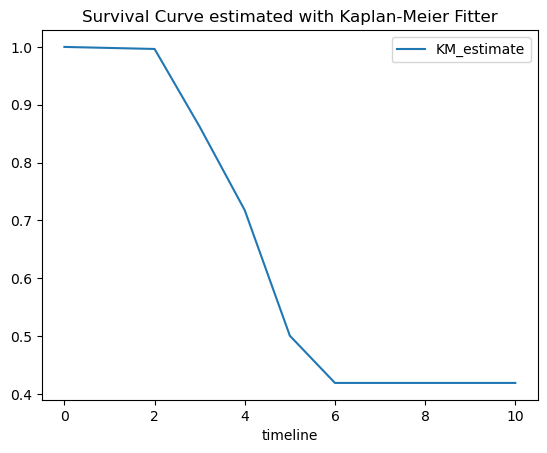

In [20]:
#plotting the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

In [21]:
#printing survival probabilities at each year
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
2.0,0.996466
3.0,0.862022
4.0,0.717594
5.0,0.500623
6.0,0.419008
7.0,0.419008
8.0,0.419008
10.0,0.419008


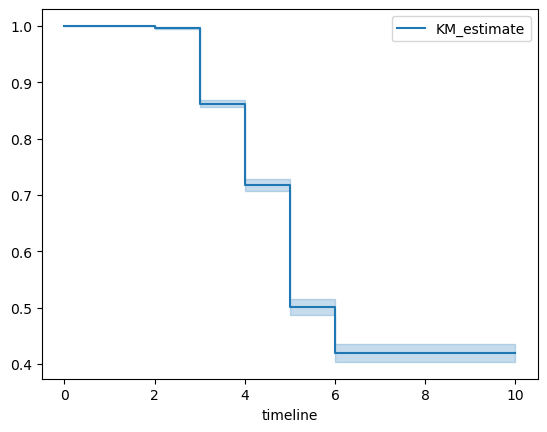

In [22]:
#plotting the survival functions with confidence intervals
kmf.plot_survival_function()
plt.show()

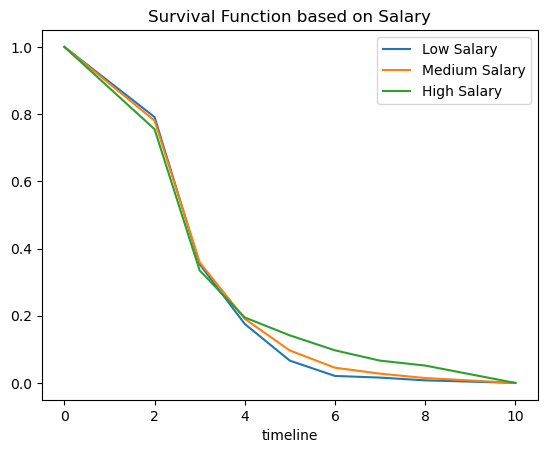

In [23]:
#defining satisfaction levels to make a Survival Function Based on Salary Levels Using MKF
Low = ((hr.salary_num == 0))
Med = ((hr.salary_num == 1))
High = ((hr.salary_num == 2))


#plotting the survival function
ax = plt.subplot()
kmf = KaplanMeierFitter()
kmf.fit(durations=hr[Low].time_spend_company,
event_observed=hr[Low].time_spend_company, label='Low Salary')
kmf.survival_function_.plot(ax=ax)
kmf.fit(durations=hr[Med].time_spend_company,
event_observed=hr[Med].time_spend_company, label='Medium Salary')
kmf.survival_function_.plot(ax=ax)
kmf.fit(durations=hr[High].time_spend_company,
event_observed=hr[High].time_spend_company, label='High Salary')
kmf.survival_function_.plot(ax=ax)
plt.title('Survival Function based on Salary')
plt.show()

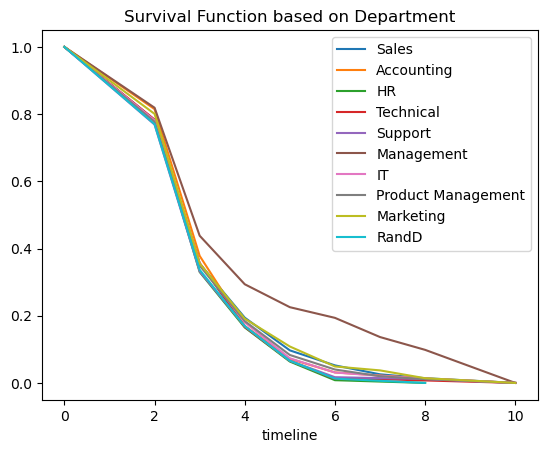

In [24]:
#defining departments to make a Survival Function Based on Salary Levels Using MKF
Sales = ((hr.department_num == 0))
Accounting = ((hr.department_num == 1))
HR = ((hr.department_num == 2))
Technical = ((hr.department_num == 3))
Support = ((hr.department_num == 4))
Management = ((hr.department_num == 5))
IT = ((hr.department_num == 6))
Product_mng = ((hr.department_num == 7))
Marketing = ((hr.department_num == 8))
RandD = ((hr.department_num == 9))



#plotting the survival function
ax = plt.subplot()
kmf = KaplanMeierFitter()
kmf.fit(durations=hr[Sales].time_spend_company,
event_observed=hr[Sales].time_spend_company, label='Sales')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=hr[Accounting].time_spend_company,
event_observed=hr[Accounting].time_spend_company, label='Accounting')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=hr[HR].time_spend_company,
event_observed=hr[HR].time_spend_company, label='HR')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=hr[Technical].time_spend_company,
event_observed=hr[Technical].time_spend_company, label='Technical')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=hr[Support].time_spend_company,
event_observed=hr[Support].time_spend_company, label='Support')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=hr[Management].time_spend_company,
event_observed=hr[Management].time_spend_company, label='Management')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=hr[IT].time_spend_company,
event_observed=hr[IT].time_spend_company, label='IT')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=hr[Product_mng].time_spend_company,
event_observed=hr[Product_mng].time_spend_company, label='Product Management')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=hr[Marketing].time_spend_company,
event_observed=hr[Marketing].time_spend_company, label='Marketing')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=hr[RandD].time_spend_company,
event_observed=hr[RandD].time_spend_company, label='RandD')
kmf.survival_function_.plot(ax=ax)


plt.title('Survival Function based on Department')
plt.show()